In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy

In [2]:
cnames = ['TIME','Lat', 'Lon', 'Head', 'Track', 'GnSpd', 'TAS', 'GeoAl', 'Press', 'WndDr', 'wndSpd','Tempr', 'Dewpt','D Val',  'RdAlt', 'MixR', 'VtWnd', 'SfcPr', 'ThetaE']
filename = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2021/larry/20210905H1.1sec.txt'
df = pd.read_csv(filename, skiprows=21, delim_whitespace=True, names=cnames)
df 

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,wndSpd,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,150517,27.848,82.063,174.3,171.5,129.5,127.0,1361.0,869.5,304.5,4.2,18.30,16.1,90.3,1363.0,13.57,0.2,1016.3,343.8
1,150518,27.847,82.063,174.5,171.6,129.6,127.0,1370.0,868.7,305.0,4.2,18.25,14.8,91.6,1372.0,13.53,0.3,1016.4,343.7
2,150519,27.845,82.063,174.7,171.7,129.7,127.1,1380.0,867.3,304.6,4.2,18.14,14.9,87.8,1381.0,13.46,0.5,1015.9,343.5
3,150520,27.843,82.063,174.8,171.8,129.8,127.2,1389.0,866.8,303.5,4.3,18.03,15.5,92.2,1390.0,13.40,0.4,1016.4,343.3
4,150521,27.843,82.063,175.1,172.0,129.9,127.2,1398.0,865.6,305.2,4.3,17.92,16.0,90.3,1399.0,13.36,0.3,1016.2,343.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,182956,17.733,65.113,117.1,118.2,121.4,128.0,856.0,919.6,95.3,7.1,22.65,16.9,47.3,858.0,15.97,-0.2,1013.5,350.5
12280,182957,17.733,65.112,116.9,118.2,121.4,127.8,854.0,919.8,93.5,7.0,22.68,17.1,45.5,855.0,15.98,-0.1,1013.3,350.5
12281,182958,17.733,65.110,116.8,118.1,121.4,128.0,851.0,920.0,95.6,7.0,22.71,17.1,44.9,852.0,15.98,0.0,1013.2,350.5
12282,182959,17.732,65.110,116.8,118.1,121.4,127.8,848.0,920.6,96.6,6.8,22.75,17.1,47.5,850.0,15.98,-0.2,1013.5,350.5


In [3]:
df.mask((df <= -900), inplace=True)
df

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,wndSpd,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,150517,27.848,82.063,174.3,171.5,129.5,127.0,1361.0,869.5,304.5,4.2,18.30,16.1,90.3,1363.0,13.57,0.2,1016.3,343.8
1,150518,27.847,82.063,174.5,171.6,129.6,127.0,1370.0,868.7,305.0,4.2,18.25,14.8,91.6,1372.0,13.53,0.3,1016.4,343.7
2,150519,27.845,82.063,174.7,171.7,129.7,127.1,1380.0,867.3,304.6,4.2,18.14,14.9,87.8,1381.0,13.46,0.5,1015.9,343.5
3,150520,27.843,82.063,174.8,171.8,129.8,127.2,1389.0,866.8,303.5,4.3,18.03,15.5,92.2,1390.0,13.40,0.4,1016.4,343.3
4,150521,27.843,82.063,175.1,172.0,129.9,127.2,1398.0,865.6,305.2,4.3,17.92,16.0,90.3,1399.0,13.36,0.3,1016.2,343.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,182956,17.733,65.113,117.1,118.2,121.4,128.0,856.0,919.6,95.3,7.1,22.65,16.9,47.3,858.0,15.97,-0.2,1013.5,350.5
12280,182957,17.733,65.112,116.9,118.2,121.4,127.8,854.0,919.8,93.5,7.0,22.68,17.1,45.5,855.0,15.98,-0.1,1013.3,350.5
12281,182958,17.733,65.110,116.8,118.1,121.4,128.0,851.0,920.0,95.6,7.0,22.71,17.1,44.9,852.0,15.98,0.0,1013.2,350.5
12282,182959,17.732,65.110,116.8,118.1,121.4,127.8,848.0,920.6,96.6,6.8,22.75,17.1,47.5,850.0,15.98,-0.2,1013.5,350.5


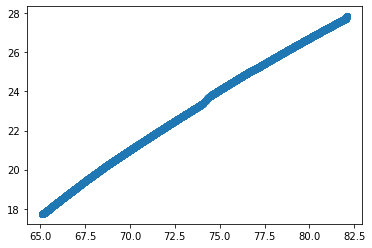

In [4]:
plt.scatter(df.Lon, df.Lat)

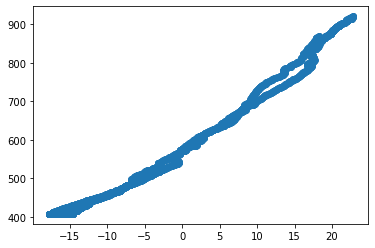

In [5]:
plt.scatter(df.Tempr, df.Press)

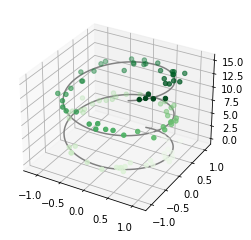

In [14]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [37]:
#New Data from HRD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = open(r"C:\Users\torip\OneDrive\Desktop\HRD Data\P3_20210925H1_211201-243558.cdf")
df = pd.read_csv(filename, skiprows=15, delim_whitespace=True, names=cnames)
df

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,wndSpd,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,150511,27.855,82.065,175.3,172.5,129.3,126.5,1305.0,875.1,301.8,5.0,18.31,16.6,87.0,1307.0,13.79,-0.7,1016.4,343.8
1,150512,27.853,82.065,175.3,172.3,129.3,126.6,1315.0,874.1,301.7,4.9,18.36,15.9,87.1,1316.0,13.76,-0.7,1016.3,343.9
2,150513,27.852,82.065,175.0,172.1,129.3,126.6,1324.0,873.3,303.7,4.7,18.35,14.9,88.7,1325.0,13.71,-0.7,1016.4,343.8
3,150514,27.852,82.065,174.7,171.9,129.3,126.6,1333.0,872.2,304.4,4.5,18.31,15.1,87.8,1335.0,13.67,-0.6,1016.2,343.8
4,150515,27.850,82.063,174.5,171.8,129.4,126.8,1343.0,871.3,305.9,4.3,18.30,15.6,88.8,1344.0,13.64,-0.3,1016.3,343.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,182956,17.733,65.113,117.1,118.2,121.4,128.0,856.0,919.6,95.3,7.1,22.65,16.9,47.3,858.0,15.97,-0.2,1013.5,350.5
12286,182957,17.733,65.112,116.9,118.2,121.4,127.8,854.0,919.8,93.5,7.0,22.68,17.1,45.5,855.0,15.98,-0.1,1013.3,350.5
12287,182958,17.733,65.110,116.8,118.1,121.4,128.0,851.0,920.0,95.6,7.0,22.71,17.1,44.9,852.0,15.98,0.0,1013.2,350.5
12288,182959,17.732,65.110,116.8,118.1,121.4,127.8,848.0,920.6,96.6,6.8,22.75,17.1,47.5,850.0,15.98,-0.2,1013.5,350.5


In [53]:
# Read augmented drops from disk, saving the time of redoing all the above
FOLDERNAME = r"C:\Users\torip\OneDrive\Desktop\HRD Data\P3_20210925H1_211201-243558.cdf"
import glob
import pandas as pd
import plotly.express as px
import os
os.environ["CDF_LIB"] = "~/CDF/lib"
from spacepy import pycdf

cdf = pycdf.CDF(r"C:\Users\torip\OneDrive\Desktop\HRD Data\P3_20210925H1_211201-243558.cdf")
print(cdf)

Exception: Cannot load CDF C library; checked . Try 'os.environ["CDF_LIB"] = library_directory' before import.

In [46]:
drops=[]
for file_name in glob.glob(FOLDERNAME):
    # print(file_name)
    drop = pd.read_csv(file_name)
    drops.append(drop)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc9 in position 63: invalid continuation byte